In [1]:
import hopsworks
from dotenv import load_dotenv
import os
load_dotenv()
api_key = os.getenv("HOPSWORKS_API_KEY")
project = hopsworks.login(api_key_value=api_key, project="project0")
fs = project.get_feature_store()

c:\Users\User\miniconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/308374
Connected. Call `.close()` to terminate connection gracefully.


In [2]:
btc_fg = fs.get_feature_group(name="btc", version=1)
query = btc_fg.select_all()
# feature_view = fs.get_or_create_feature_view(name="btc",
#                                   version=1,
#                                   description="Read from bitcoin dataset",
#                                   labels=["close"],
#                                   query=query)

In [3]:
feature_join = btc_fg.select(["open_time", "close_time", 'open', 'high', 'low', 'close', 'volume'])
feature_join

In [4]:
df = feature_join.read(online=False, dataframe_type="default", read_options={})
df

Finished: Reading data from Hopsworks, using ArrowFlight (1.12s) 


,open_time,close_time,open,high,low,close,volume
0,2020-05-11 00:00:00+00:00,2020-05-11 23:59:59.999000+00:00,8722.77,9168.00,8200.00,8561.52,168807.251832
1,2020-10-29 00:00:00+00:00,2020-10-29 23:59:59.999000+00:00,13266.40,13642.91,12920.77,13455.70,74872.602132
2,2021-06-29 00:00:00+00:00,2021-06-29 23:59:59.999000+00:00,34494.89,36600.00,34225.43,35911.73,90788.796220
3,2018-09-15 00:00:00+00:00,2018-09-15 23:59:59.999000+00:00,6476.63,6565.45,6466.13,6514.96,25243.656612
4,2018-11-23 00:00:00+00:00,2018-11-23 23:59:59.999000+00:00,4370.90,4484.00,4222.94,4420.61,49371.920322
...,...,...,...,...,...,...,...
2173,2023-07-23 00:00:00+00:00,2023-07-23 23:59:59.999000+00:00,29793.99,30350.00,29730.00,30083.75,18292.786370
2174,2023-12-06 00:00:00+00:00,2023-12-06 23:59:59.999000+00:00,44073.82,44297.21,43335.28,43762.69,51431.104920
2175,2023-05-03 00:00:00+00:00,2023-05-03 23:59:59.999000+00:00,28669.85,29266.66,28113.69,29026.16,64615.792130
2176,2018-09-05 00:00:00+00:00,2018-09-05 23:59:59.999000+00:00,7359.05,7397.30,6682.00,6700.00,63715.256267


In [5]:
df_sorted = df.sort_values(by='open_time')
df = df_sorted.reset_index(drop=True)
df

,open_time,close_time,open,high,low,close,volume
0,2018-01-01 00:00:00+00:00,2018-01-01 23:59:59.999000+00:00,13715.65,13818.55,12750.00,13380.00,8609.915844
1,2018-01-02 00:00:00+00:00,2018-01-02 23:59:59.999000+00:00,13382.16,15473.49,12890.02,14675.11,20078.092111
2,2018-01-03 00:00:00+00:00,2018-01-03 23:59:59.999000+00:00,14690.00,15307.56,14150.00,14919.51,15905.667639
3,2018-01-04 00:00:00+00:00,2018-01-04 23:59:59.999000+00:00,14919.51,15280.00,13918.04,15059.54,21329.649574
4,2018-01-05 00:00:00+00:00,2018-01-05 23:59:59.999000+00:00,15059.56,17176.24,14600.00,16960.39,23251.491125
...,...,...,...,...,...,...,...
2173,2023-12-14 00:00:00+00:00,2023-12-14 23:59:59.999000+00:00,42869.03,43420.00,41400.00,43022.26,42047.057090
2174,2023-12-15 00:00:00+00:00,2023-12-15 23:59:59.999000+00:00,43022.26,43080.81,41666.00,41940.30,33421.793200
2175,2023-12-16 00:00:00+00:00,2023-12-16 23:59:59.999000+00:00,41940.29,42724.43,41605.00,42278.03,24118.857470
2176,2023-12-17 00:00:00+00:00,2023-12-17 23:59:59.999000+00:00,42278.02,42424.07,41510.00,41718.89,24880.677920


In [6]:
#df.to_csv('btc.csv', index=False)

**Process data and create a predictive model**

In [7]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization, LayerNormalization
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import datetime as dt
import mplfinance as mpf 
import matplotlib.pyplot as plt

In [8]:
historical_df = df.set_index("open_time")
historical_df = historical_df["close"].values
historical_df

array([13380.  , 14675.11, 14919.51, ..., 42278.03, 41718.89, 41327.7 ])

In [9]:
n_historical_days = 100
n_prediction_days = 1

In [10]:
X, y = [], []
for x in range(n_historical_days, len(historical_df) - n_prediction_days):
    X.append(historical_df[x - n_historical_days:x])
    y.append(historical_df[x:x + n_prediction_days])

X, y = np.array(X)[..., np.newaxis], np.array(y)
X.shape

(2077, 100, 1)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

In [67]:
# Normalization (min-max scaling between -1 and 1)
data_max, data_min = max(X_train.max(), y_train.max()), min(X_train.min(), y_train.min())

def scale(data):
    return (data - data_min) / (data_max - data_min) * 2 - 1

def unscale(data):
    return (data + 1) / 2 * (data_max - data_min) + data_min

X_train, y_train = scale(X_train), scale(y_train)
X_test, y_test = scale(X_test), scale(y_test)

In [13]:
# Shuffle
X_train , y_train = shuffle(X_train, y_train)

**Create the Neural Network**

In [46]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1:])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
    )


Epoch 1/10
52/52 [==============================] - 7s 55ms/step - loss: 0.0504 - val_loss: 0.0033
Epoch 2/10
52/52 [==============================] - 2s 42ms/step - loss: 0.0104 - val_loss: 0.0022
Epoch 3/10
52/52 [==============================] - 2s 45ms/step - loss: 0.0096 - val_loss: 0.0020
Epoch 4/10
52/52 [==============================] - 3s 59ms/step - loss: 0.0089 - val_loss: 0.0021
Epoch 5/10
52/52 [==============================] - 3s 59ms/step - loss: 0.0088 - val_loss: 0.0018
Epoch 6/10
52/52 [==============================] - 3s 57ms/step - loss: 0.0080 - val_loss: 0.0017
Epoch 7/10
52/52 [==============================] - 3s 57ms/step - loss: 0.0071 - val_loss: 0.0016
Epoch 8/10
52/52 [==============================] - 3s 61ms/step - loss: 0.0077 - val_loss: 0.0017
Epoch 9/10
52/52 [==============================] - 3s 60ms/step - loss: 0.0067 - val_loss: 0.0016
Epoch 10/10
52/52 [==============================] - 3s 54ms/step - loss: 0.0068 - val_loss: 0.0015


In [47]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_6 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


**Test the Model**

In [49]:
actual_prices_scaled = y_test[:, -1]
# actual_prices_scaled

In [50]:
prediction_prices_scaled = model.predict(X_test)[:, -1]
# prediction_prices_scaled

13/13 [==============================] - 1s 15ms/step


In [51]:
# Perform the inverse scaling.
prediction_prices =  unscale(prediction_prices_scaled)

In [52]:
actual_prices = unscale(actual_prices_scaled)

**Plot model**

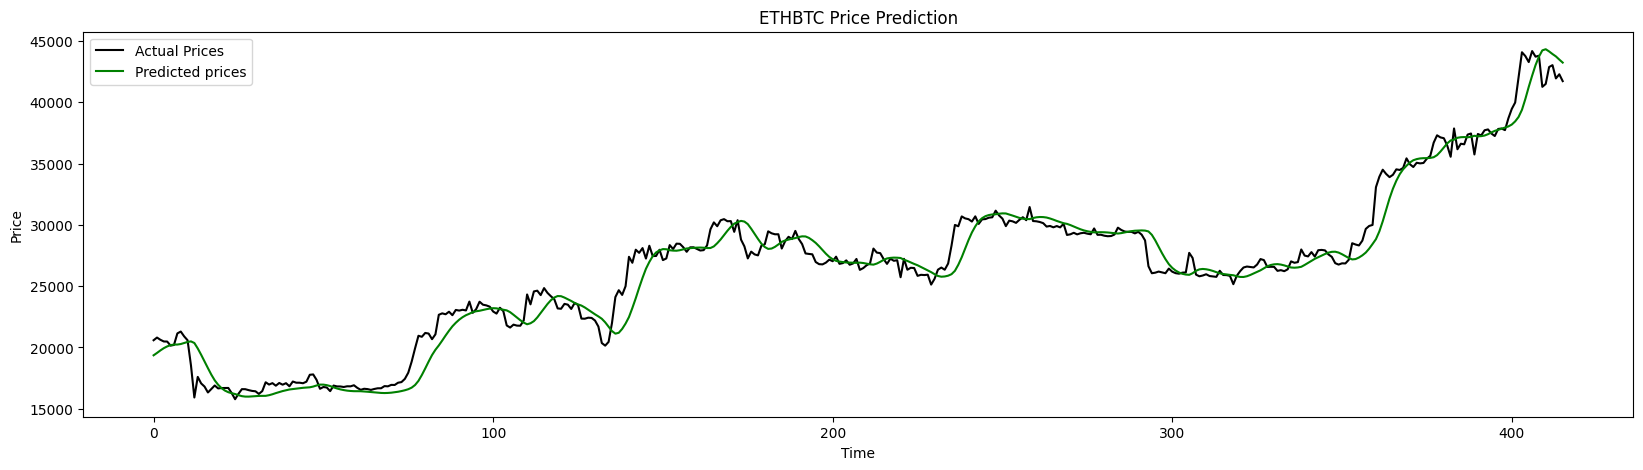

In [53]:
plt.figure(figsize=(20, 5))
plt.plot(actual_prices, color="black", label="Actual Prices")
plt.plot(prediction_prices , color="green", label="Predicted prices")
plt.title("ETHBTC Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(actual_prices, prediction_prices)
np.sqrt(mse)

1258.0530089966023

**Delete model**

In [55]:
# mr = project.get_model_registry()
# model_old = mr.get_model("btc_model", version=1)
# model_old.delete()

**Register the model**

In [56]:
model

In [59]:
mr = project.get_model_registry()
model_dir="btc_model"
if os.path.isdir(model_dir) == False:
    os.mkdir(model_dir)

# Save the model
model.save(model_dir + '/btc_model.h5')  # creates a HDF5 file 'btc_model.h5'

btc_model = mr.python.create_model(
    name="btc_model",
    metrics = {"MSE": mse},
    description="Bitcoin/USD value predictor"
)

btc_model.save(model_dir)

Connected. Call `.close()` to terminate connection gracefully.


Uploading: 100.000%|██████████| 414024/414024 elapsed<00:02 remaining<00:00  2.44it/s]
Model export complete: 100%|██████████| 6/6 [00:08<00:00,  1.46s/it]                   

Model created, explore it at https://c.app.hopsworks.ai:443/p/308374/models/btc_model/1


Model(name: 'btc_model', version: 1)